##### Imports

In [52]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from prophet import Prophet

In [ ]:
chicago_df_1 = pd.read_csv('./data/Chicago_Crimes_2001_to_2004.csv', error_bad_lines= False)
chicago_df_2 = pd.read_csv('./data/Chicago_Crimes_2005_to_2007.csv', error_bad_lines= False)
chicago_df_3 = pd.read_csv('./data/Chicago_Crimes_2008_to_2011.csv', error_bad_lines= False)
chicago_df_4 = pd.read_csv('./data/Chicago_Crimes_2012_to_2017.csv', error_bad_lines= False)

In [54]:
chicago_df = pd.concat([chicago_df_1,chicago_df_2,chicago_df_3,chicago_df_4], ignore_index=False, axis=0)

##### Explore the dataset and cleaning

In [55]:
chicago_df.head(3)

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,879,4786321,HM399414,01/01/2004 12:01:00 AM,082XX S COLES AVE,0840,THEFT,FINANCIAL ID THEFT: OVER $300,RESIDENCE,False,...,7.0,46.0,06,NaN,NaN,2004.0,08/17/2015 03:03:40 PM,NaN,NaN,NaN
1,2544,4676906,HM278933,03/01/2003 12:00:00 AM,004XX W 42ND PL,2825,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,...,11.0,61.0,26,1173974.0,1876757.0,2003.0,04/15/2016 08:55:02 AM,41.817229,-87.637328,"(41.817229156, -87.637328162)"
2,2919,4789749,HM402220,06/20/2004 11:00:00 AM,025XX N KIMBALL AVE,1752,OFFENSE INVOLVING CHILDREN,AGG CRIM SEX ABUSE FAM MEMBER,RESIDENCE,False,...,35.0,22.0,20,NaN,NaN,2004.0,08/17/2015 03:03:40 PM,NaN,NaN,NaN


In [56]:
chicago_df.drop(['Unnamed: 0','Case Number', 'ID', 'IUCR',  'X Coordinate', 'Y Coordinate', 'Updated On', 'Year', 'FBI Code', 'Beat', 'Ward', 'Community Area', 'Location', 'District', 'Latitude','Longitude' ], inplace= True, axis= 1)

<AxesSubplot: >

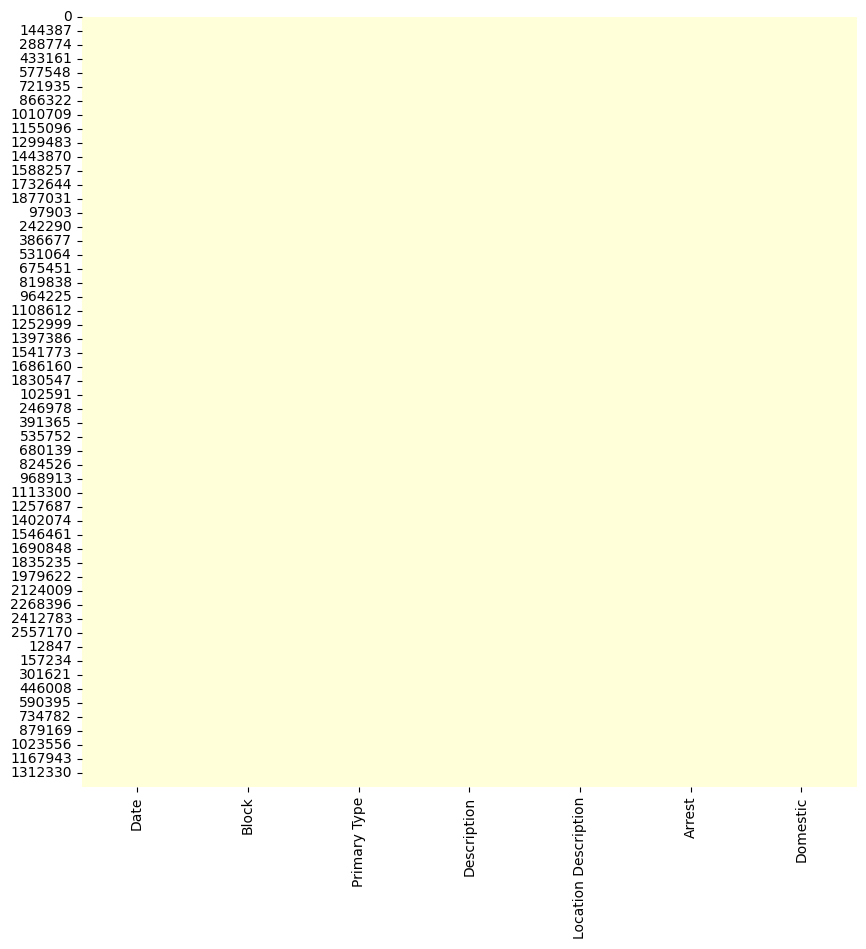

In [57]:
plt.figure(figsize=(10,10))
sns.heatmap(chicago_df.isnull(), cbar = False, cmap= 'YlGnBu')

In [58]:
chicago_df

,Date,Block,Primary Type,Description,Location Description,Arrest,Domestic
0,01/01/2004 12:01:00 AM,082XX S COLES AVE,THEFT,FINANCIAL ID THEFT: OVER $300,RESIDENCE,False,False
1,03/01/2003 12:00:00 AM,004XX W 42ND PL,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,True
2,06/20/2004 11:00:00 AM,025XX N KIMBALL AVE,OFFENSE INVOLVING CHILDREN,AGG CRIM SEX ABUSE FAM MEMBER,RESIDENCE,False,False
3,12/30/2004 08:00:00 PM,045XX W MONTANA ST,THEFT,FINANCIAL ID THEFT: OVER $300,OTHER,False,False
4,05/01/2003 01:00:00 AM,111XX S NORMAL AVE,THEFT,FINANCIAL ID THEFT:$300 &UNDER,RESIDENCE,False,False
...,...,...,...,...,...,...,...
1456709,05/03/2016 11:33:00 PM,026XX W 23RD PL,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,True
1456710,05/03/2016 11:30:00 PM,073XX S HARVARD AVE,CRIMINAL DAMAGE,TO PROPERTY,APARTMENT,True,True
1456711,05/03/2016 12:15:00 AM,024XX W 63RD ST,BATTERY,AGGRAVATED: HANDGUN,SIDEWALK,False,False
1456712,05/03/2016 09:07:00 PM,082XX S EXCHANGE AVE,BATTERY,DOMESTIC BATTERY SIMPLE,SIDEWALK,False,True


In [59]:
chicago_df.Date = pd.to_datetime(chicago_df.Date, format= '%m/%d/%Y %I:%M:%S %p')

In [60]:
chicago_df

,Date,Block,Primary Type,Description,Location Description,Arrest,Domestic
0,2004-01-01 00:01:00,082XX S COLES AVE,THEFT,FINANCIAL ID THEFT: OVER $300,RESIDENCE,False,False
1,2003-03-01 00:00:00,004XX W 42ND PL,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,True
2,2004-06-20 11:00:00,025XX N KIMBALL AVE,OFFENSE INVOLVING CHILDREN,AGG CRIM SEX ABUSE FAM MEMBER,RESIDENCE,False,False
3,2004-12-30 20:00:00,045XX W MONTANA ST,THEFT,FINANCIAL ID THEFT: OVER $300,OTHER,False,False
4,2003-05-01 01:00:00,111XX S NORMAL AVE,THEFT,FINANCIAL ID THEFT:$300 &UNDER,RESIDENCE,False,False
...,...,...,...,...,...,...,...
1456709,2016-05-03 23:33:00,026XX W 23RD PL,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,True
1456710,2016-05-03 23:30:00,073XX S HARVARD AVE,CRIMINAL DAMAGE,TO PROPERTY,APARTMENT,True,True
1456711,2016-05-03 00:15:00,024XX W 63RD ST,BATTERY,AGGRAVATED: HANDGUN,SIDEWALK,False,False
1456712,2016-05-03 21:07:00,082XX S EXCHANGE AVE,BATTERY,DOMESTIC BATTERY SIMPLE,SIDEWALK,False,True


In [61]:
chicago_df['Primary Type'].value_counts()

THEFT                                1640506
BATTERY                              1442716
CRIMINAL DAMAGE                       923000
NARCOTICS                             885431
OTHER OFFENSE                         491922
ASSAULT                               481661
BURGLARY                              470958
MOTOR VEHICLE THEFT                   370548
ROBBERY                               300453
DECEPTIVE PRACTICE                    280931
CRIMINAL TRESPASS                     229366
PROSTITUTION                           86401
WEAPONS VIOLATION                      77429
PUBLIC PEACE VIOLATION                 58548
OFFENSE INVOLVING CHILDREN             51441
CRIM SEXUAL ASSAULT                    29868
SEX OFFENSE                            28707
GAMBLING                               18806
LIQUOR LAW VIOLATION                   17513
INTERFERENCE WITH PUBLIC OFFICER       15710
ARSON                                  13097
HOMICIDE                                9051
KIDNAPPING

In [62]:
order_data = chicago_df['Primary Type'].value_counts().iloc[:10].index

<AxesSubplot: xlabel='count', ylabel='Primary Type'>

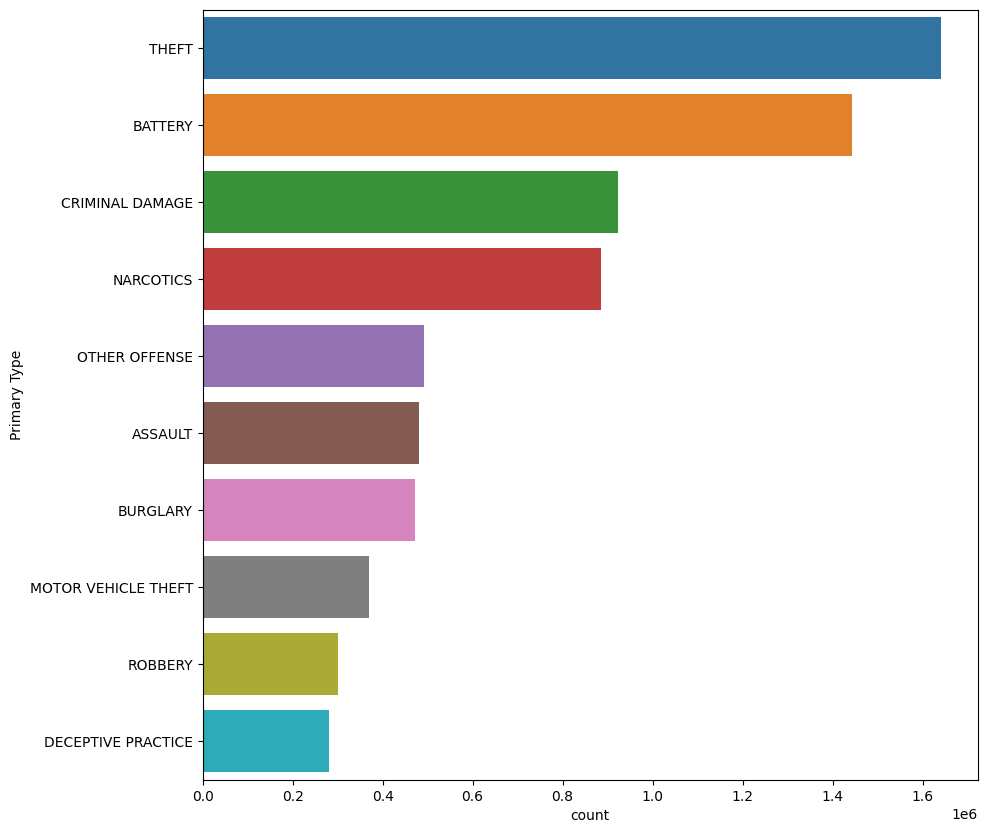

In [63]:
plt.figure(figsize=(10,10))
sns.countplot(y = 'Primary Type', data= chicago_df, order= order_data)

<AxesSubplot: xlabel='count', ylabel='Location Description'>

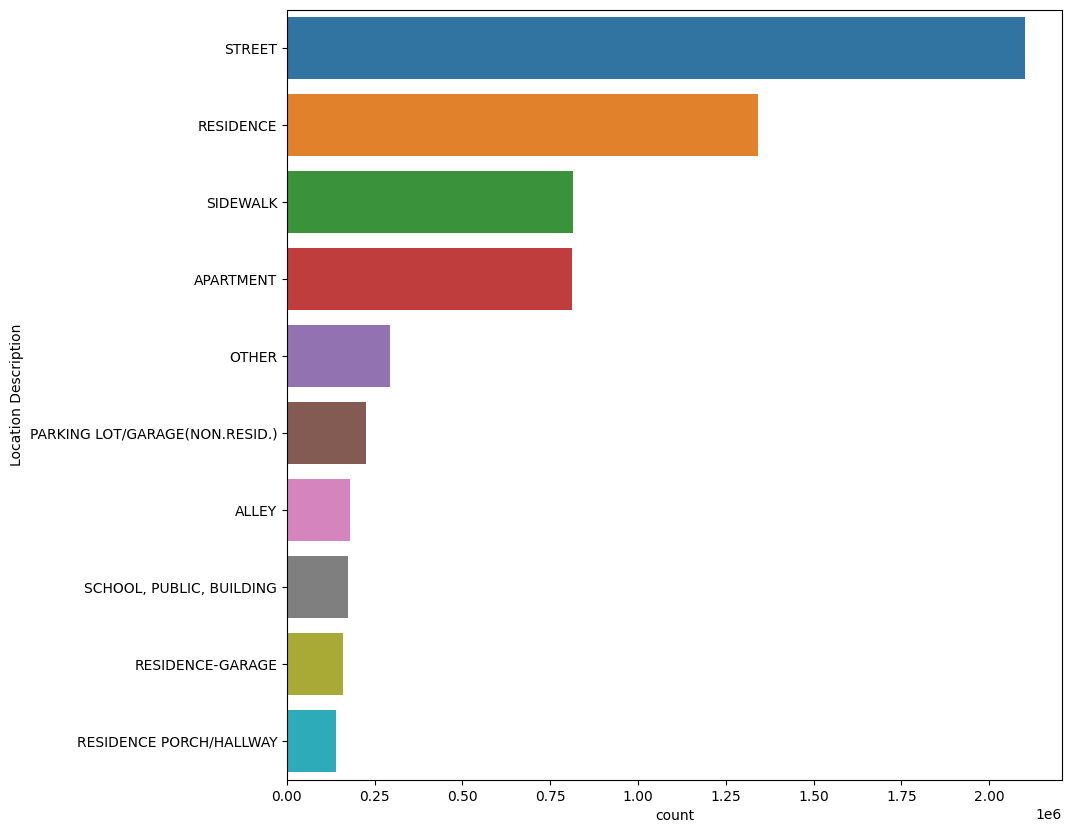

In [64]:
plt.figure(figsize=(10,10))
sns.countplot( y = 'Location Description', data= chicago_df, order= chicago_df['Location Description'].value_counts().iloc[:10].index)

In [65]:
chicago_df.index = pd.DatetimeIndex(chicago_df.Date)

In [66]:

chicago_df.resample('Y').size()

Date
2001-12-31    568518
2002-12-31    490879
2003-12-31    475913
2004-12-31    388205
2005-12-31    455811
2006-12-31    794684
2007-12-31    621848
2008-12-31    852053
2009-12-31    783900
2010-12-31    700691
2011-12-31    352066
2012-12-31    335670
2013-12-31    306703
2014-12-31    274527
2015-12-31    262995
2016-12-31    265462
2017-12-31     11357
Freq: A-DEC, dtype: int64

Text(0, 0.5, 'Crimes')

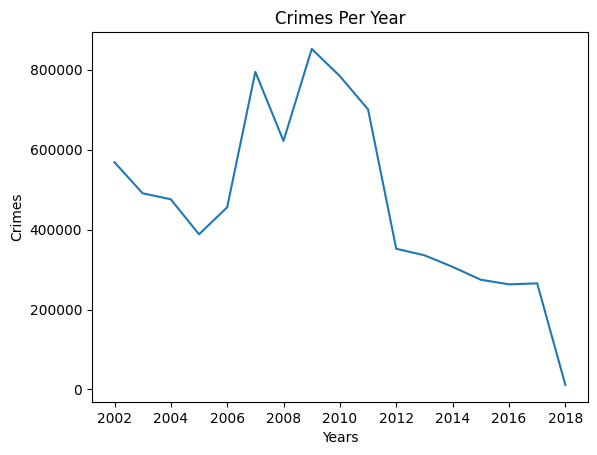

In [67]:
plt.plot(chicago_df.resample('Y').size())
plt.title('Crimes Per Year')
plt.xlabel('Years')
plt.ylabel('Crimes')

In [68]:
chicago_df.resample('M').size()

Date
2001-01-31    74995
2001-02-28    66288
2001-03-31    53122
2001-04-30    40166
2001-05-31    41876
              ...  
2016-09-30    23235
2016-10-31    23314
2016-11-30    21140
2016-12-31    19580
2017-01-31    11357
Freq: M, Length: 193, dtype: int64

Text(0, 0.5, 'Crimes')

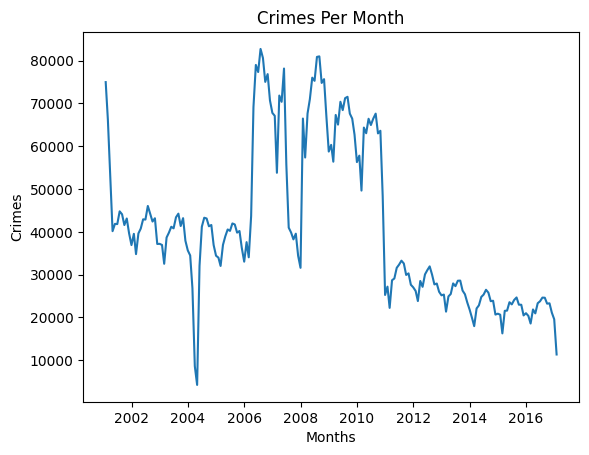

In [69]:
plt.plot(chicago_df.resample('M').size())
plt.title('Crimes Per Month')
plt.xlabel('Months')
plt.ylabel('Crimes')

In [70]:
chicago_df.resample('Q').size()

Date
2001-03-31    194405
2001-06-30    123865
2001-09-30    130518
2001-12-31    119730
2002-03-31    113998
               ...  
2016-03-31     60843
2016-06-30     68085
2016-09-30     72500
2016-12-31     64034
2017-03-31     11357
Freq: Q-DEC, Length: 65, dtype: int64

Text(0, 0.5, 'Crimes')

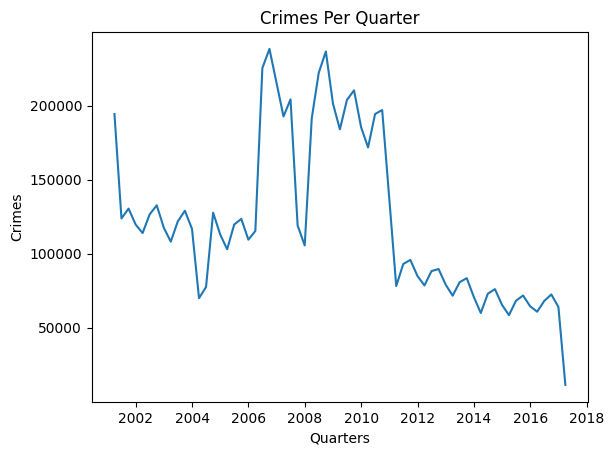

In [71]:
plt.plot(chicago_df.resample('Q').size())
plt.title('Crimes Per Quarter')
plt.xlabel('Quarters')
plt.ylabel('Crimes')

##### Prepare the data

In [72]:
chicago_prophet = chicago_df.resample('M').size().reset_index()

In [73]:
chicago_prophet

,Date,0
0,2001-01-31,74995
1,2001-02-28,66288
2,2001-03-31,53122
3,2001-04-30,40166
4,2001-05-31,41876
...,...,...
188,2016-09-30,23235
189,2016-10-31,23314
190,2016-11-30,21140
191,2016-12-31,19580


In [74]:
chicago_prophet.columns = ['Date', 'Crime Count']

In [75]:
chicago_prophet

,Date,Crime Count
0,2001-01-31,74995
1,2001-02-28,66288
2,2001-03-31,53122
3,2001-04-30,40166
4,2001-05-31,41876
...,...,...
188,2016-09-30,23235
189,2016-10-31,23314
190,2016-11-30,21140
191,2016-12-31,19580


In [76]:
chicago_prophet_df = pd.DataFrame(chicago_prophet)

In [77]:
chicago_prophet_df

,Date,Crime Count
0,2001-01-31,74995
1,2001-02-28,66288
2,2001-03-31,53122
3,2001-04-30,40166
4,2001-05-31,41876
...,...,...
188,2016-09-30,23235
189,2016-10-31,23314
190,2016-11-30,21140
191,2016-12-31,19580


In [78]:
chicago_prophet_df_final = chicago_prophet_df.rename(columns={'Date':'ds', 'Crime Count':'y'})

In [79]:
chicago_prophet_df_final

,ds,y
0,2001-01-31,74995
1,2001-02-28,66288
2,2001-03-31,53122
3,2001-04-30,40166
4,2001-05-31,41876
...,...,...
188,2016-09-30,23235
189,2016-10-31,23314
190,2016-11-30,21140
191,2016-12-31,19580


##### Make a Prediction

In [80]:
m = Prophet()
m.fit(chicago_prophet_df_final)

18:55:50 - cmdstanpy - INFO - Chain [1] start processing
18:55:50 - cmdstanpy - INFO - Chain [1] done processing


In [81]:
future = m.make_future_dataframe(periods=720)
forecast = m.predict(future)

In [82]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2001-01-31,40560.409000,21958.054787,56137.360640,40560.409000,40560.409000,-1573.512564,-1573.512564,-1573.512564,-1573.512564,-1573.512564,-1573.512564,0.0,0.0,0.0,38986.896436
1,2001-02-28,40707.671716,18810.315531,51215.383664,40707.671716,40707.671716,-6455.297210,-6455.297210,-6455.297210,-6455.297210,-6455.297210,-6455.297210,0.0,0.0,0.0,34252.374505
2,2001-03-31,40870.712579,22447.731163,54512.832495,40870.712579,40870.712579,-2068.159198,-2068.159198,-2068.159198,-2068.159198,-2068.159198,-2068.159198,0.0,0.0,0.0,38802.553381
3,2001-04-30,41028.494060,23242.917083,55956.943907,41028.494060,41028.494060,-1473.672810,-1473.672810,-1473.672810,-1473.672810,-1473.672810,-1473.672810,0.0,0.0,0.0,39554.821250
4,2001-05-31,41191.534924,28357.153135,60973.583089,41191.534924,41191.534924,3883.348988,3883.348988,3883.348988,3883.348988,3883.348988,3883.348988,0.0,0.0,0.0,45074.883912
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
908,2019-01-17,4144.563337,-22523.593431,9664.743188,3102.141276,5099.944760,-10297.184218,-10297.184218,-10297.184218,-10297.184218,-10297.184218,-10297.184218,0.0,0.0,0.0,-6152.620880
909,2019-01-18,4130.573086,-21592.511530,10940.299487,3085.957764,5087.571102,-9982.172550,-9982.172550,-9982.172550,-9982.172550,-9982.172550,-9982.172550,0.0,0.0,0.0,-5851.599464
910,2019-01-19,4116.582835,-20220.965159,11292.173300,3069.774253,5075.197444,-9545.266437,-9545.266437,-9545.266437,-9545.266437,-9545.266437,-9545.266437,0.0,0.0,0.0,-5428.683602
911,2019-01-20,4102.592584,-20694.725310,11787.506773,3053.590741,5062.823785,-8995.504545,-8995.504545,-8995.504545,-8995.504545,-8995.504545,-8995.504545,0.0,0.0,0.0,-4892.911960


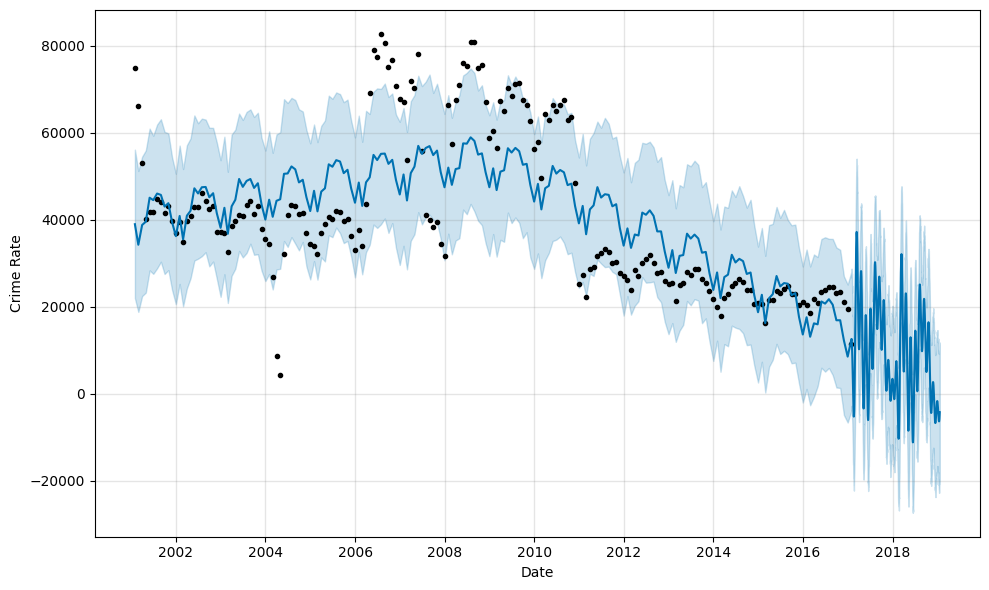

In [83]:
figure = m.plot(forecast, xlabel='Date', ylabel='Crime Rate')

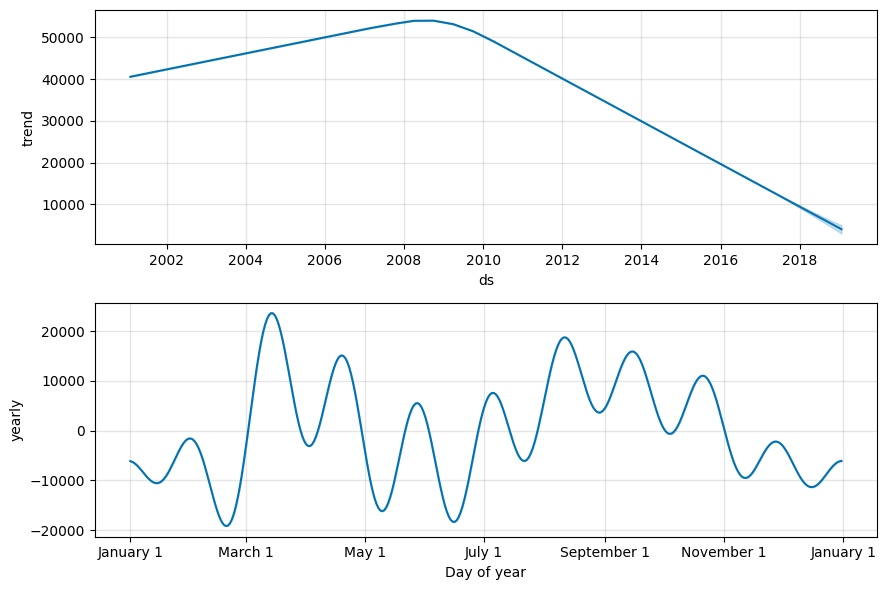

In [84]:
figure3 = m.plot_components(forecast)